In [1]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.preprocessing import image


In [2]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)


In [4]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(r'C:\Users\Hp\COVID-19 CT\CT\for_training', batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( r'C:\Users\Hp\COVID-19 CT\CT\for_testing',  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 6208 images belonging to 2 classes.
Found 1836 images belonging to 2 classes.


In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Flatten the output layer to 1 dimension
x1 = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x1 = layers.Dense(512, activation='relu')(x1)

# Add a dropout rate of 0.5
x1 = layers.Dropout(0.5)(x1)

# Add a final sigmoid layer for classification
x1 = layers.Dense(1, activation='sigmoid')(x1)

model = tf.keras.models.Model(base_model.input, x1)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [10]:
vgghist19 = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 150, epochs = 3)

Epoch 1/3
150/150 [==============================] - 1846s 12s/step - loss: 0.6302 - acc: 0.6810 - val_loss: 0.6478 - val_acc: 0.6471
Epoch 2/3
150/150 [==============================] - 3139s 21s/step - loss: 0.6319 - acc: 0.6724 - val_loss: 0.6474 - val_acc: 0.6471
Epoch 3/3
150/150 [==============================] - 2134s 14s/step - loss: 0.6257 - acc: 0.6790 - val_loss: 0.6479 - val_acc: 0.6471


92/92 [==============================] - 668s 7s/step


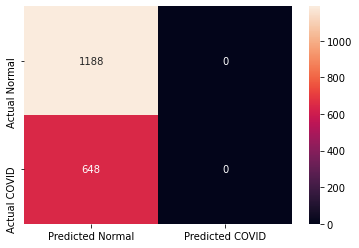

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
preds = model.predict(validation_generator,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
cm = pd.DataFrame(data=confusion_matrix(validation_generator.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


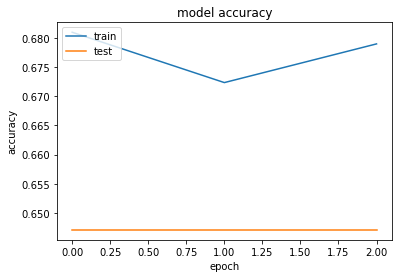

[0.6809999942779541, 0.6723560690879822, 0.6790000200271606]


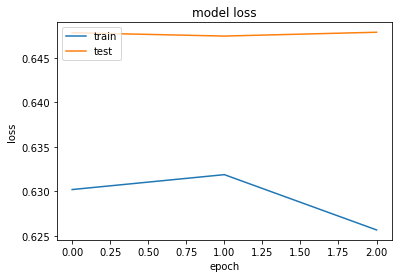

[0.6301891803741455, 0.6318636536598206, 0.6256515979766846]


In [20]:

# plotting graphs 
print(vgghist19.history.keys())
# summarize history for accuracy
plt.plot(vgghist19.history['acc'])
plt.plot(vgghist19.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(vgghist19.history['acc'])
# summarize history for loss
plt.plot(vgghist19.history['loss'])
plt.plot(vgghist19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(vgghist19.history['loss'])